Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor

from scipy import stats

import joblib

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("car_price_prediction.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


Data Cleansing

In [7]:
df.describe(include = 'object')

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5819,3769,1083,8736,13954,10150,3916,721,13514,12874,18332,17753,5033


In [8]:
df[df.duplicated()]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
425,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,18503,-,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
1972,45507765,20385,-,MERCEDES-BENZ,CLS 500,2005,Sedan,Yes,Petrol,5,230000 km,8.0,Tiptronic,Rear,04-May,Left wheel,Silver,10
2131,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,45815465,2352,1273,LEXUS,IS 350,2015,Sedan,Yes,Petrol,3.5,80856 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19137,45810466,15125,642,CHEVROLET,Orlando,2012,Jeep,Yes,Diesel,2,156834 km,4.0,Automatic,Front,04-May,Left wheel,Golden,4
19200,45725908,36065,640,MERCEDES-BENZ,CLA 250 AMG,2013,Sedan,Yes,Petrol,2.0 Turbo,68000 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
19203,45761487,13485,645,TOYOTA,Prius,2011,Sedan,No,Hybrid,1.8,281600 km,6.0,Automatic,Front,04-May,Left wheel,Grey,8


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df['Levy'].value_counts()

-       5709
765      482
891      453
639      403
640      398
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [12]:
df['Levy'].replace({'-':np.nan}, inplace=True)

In [13]:
df['Levy'] = df['Levy'].astype(float)

In [14]:
df['Doors'].value_counts()

04-May    18032
02-Mar      768
>5          124
Name: Doors, dtype: int64

In [15]:
df['Doors'].replace({'04-May':4, '02-Mar':2, '>5':5}, inplace=True)

In [16]:
#df.drop(columns=['Levy'], inplace=True)

In [17]:
df['Mileage'].value_counts()

0 km         714
200000 km    181
150000 km    159
160000 km    120
180000 km    117
            ... 
100563 km      1
354300 km      1
21178 km       1
110539 km      1
186923 km      1
Name: Mileage, Length: 7687, dtype: int64

In [18]:
df['Mileage']=df['Mileage'].str.split(' ').str.get(0)

In [19]:
df['Mileage']=df['Mileage'].astype(int)
df["Mileage"].head()

0    186005
1    192000
2    200000
3    168966
4     91901
Name: Mileage, dtype: int32

In [20]:
df['Engine volume'].value_counts()

2            3856
2.5          2246
1.8          1743
1.6          1446
1.5          1289
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: Engine volume, Length: 107, dtype: int64

In [21]:
df['Engine volume'] = df['Engine volume'].str.lower()
df["has_turbo"] = df["Engine volume"].str.contains("turbo")

In [22]:
df['Engine volume']=df['Engine volume'].str.split(' ').str.get(0)

In [23]:
df['Engine volume']=df['Engine volume'].astype(float)
df["Engine volume"].head()

0    3.5
1    3.0
2    1.3
3    2.5
4    1.3
Name: Engine volume, dtype: float64

In [24]:
df['has_turbo'].head()

0    False
1    False
2    False
3    False
4    False
Name: has_turbo, dtype: bool

Outliers

In [25]:
display(df[df.Price == df.Price.max()])

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,has_turbo
16983,45812886,26307500,NaN,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999,4.0,Manual,Front,2,Left wheel,Blue,0,False


In [26]:
display(df[df.Price < 1000])

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,has_turbo
7,45816158,549,751.0,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118,4.0,Automatic,Front,4,Left wheel,Grey,12,False
10,45621750,941,1053.0,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,184467,6.0,Automatic,Rear,4,Left wheel,White,12,False
15,45465200,549,1079.0,TOYOTA,CHR,2018,Jeep,Yes,Petrol,2.0,74146,4.0,Automatic,Front,4,Left wheel,White,12,False
18,45772104,549,2386.0,HYUNDAI,Sonata,2006,Sedan,Yes,Petrol,3.3,295059,6.0,Automatic,Rear,4,Left wheel,Blue,12,False
19,45653306,941,1850.0,LEXUS,RX 400,2008,Jeep,Yes,Hybrid,3.5,364523,6.0,Automatic,4x4,4,Left wheel,Black,12,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19218,45748699,30,NaN,NISSAN,Note,2006,Hatchback,No,Petrol,1.3,0,4.0,Automatic,Front,4,Right-hand drive,Green,9,False
19228,45773726,706,1850.0,MERCEDES-BENZ,E 350,2008,Sedan,Yes,Diesel,3.5,122874,6.0,Automatic,Rear,4,Left wheel,Black,12,False
19229,39977395,50,NaN,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000,4.0,Automatic,Front,4,Left wheel,Silver,6,False
19230,45760891,470,645.0,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325,4.0,Automatic,Front,4,Left wheel,Silver,12,False


In [27]:
display(df[df.Mileage == df.Mileage.max()])

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,has_turbo
2278,45346940,6899,NaN,VOLKSWAGEN,Golf,1999,Sedan,No,Petrol,1.6,2147483647,4.0,Manual,Front,4,Left wheel,Black,4,False
6157,45793107,5959,NaN,MERCEDES-BENZ,C 180,1995,Sedan,No,CNG,1.8,2147483647,4.0,Manual,Rear,4,Left wheel,Blue,5,False
11901,45332500,10036,NaN,SUBARU,Forester,2005,Jeep,No,Petrol,2.0,2147483647,4.0,Tiptronic,4x4,4,Right-hand drive,White,12,False
12734,45816448,2200,NaN,UAZ,31514,1968,Jeep,Yes,CNG,2.4,2147483647,4.0,Manual,4x4,4,Left wheel,Black,10,False
15347,45761457,3,NaN,BMW,525,1995,Sedan,No,Petrol,2.8,2147483647,6.0,Manual,Rear,4,Left wheel,Black,3,False
15393,45762319,15681,NaN,TOYOTA,Prius,2008,Sedan,No,Petrol,2.0,2147483647,4.0,Automatic,Front,4,Left wheel,Blue,0,False
19167,45799423,18817,1995.0,FORD,Transit,2003,Microbus,No,Diesel,2.4,2147483647,4.0,Manual,Front,2,Left wheel,White,2,True


In [28]:
display(df[df.Mileage < 1000])

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,has_turbo
11,45814819,8781,NaN,FORD,Transit,1999,Microbus,No,CNG,4.0,0,8.0,Manual,Rear,2,Left wheel,Blue,0,False
24,45813492,4704,NaN,OPEL,Vectra,1995,Sedan,No,Petrol,1.8,0,4.0,Automatic,Front,4,Left wheel,Green,4,False
26,45759112,549,2455.0,LEXUS,GX 470,2008,Jeep,Yes,Petrol,4.7,0,8.0,Automatic,4x4,4,Left wheel,White,0,False
83,45765301,8154,NaN,HONDA,Cr-v,1998,Jeep,No,Petrol,2.0,0,4.0,Automatic,4x4,4,Right-hand drive,White,2,False
97,45749534,4234,NaN,HONDA,Civic,1997,Hatchback,Yes,Petrol,1.4,0,4.0,Manual,Front,2,Left wheel,Blue,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19064,45791823,2900,NaN,BMW,320,1994,Sedan,Yes,Petrol,2.0,0,6.0,Manual,Rear,4,Left wheel,Green,2,False
19088,45782030,2200,NaN,PEUGEOT,406,2001,Sedan,No,Petrol,2.0,0,4.0,Manual,Front,4,Left wheel,White,2,False
19103,45748748,30,NaN,NISSAN,Tiida,2006,Hatchback,No,Petrol,1.5,0,4.0,Automatic,Front,4,Right-hand drive,Black,4,False
19218,45748699,30,NaN,NISSAN,Note,2006,Hatchback,No,Petrol,1.3,0,4.0,Automatic,Front,4,Right-hand drive,Green,9,False


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              13215 non-null  float64
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  float64
 10  Mileage           18924 non-null  int32  
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  int64  
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

In [30]:
def detect_outliers(df,features,thold):
    
    outlier_indices=[]
    for f in features:
        Q1=np.percentile(df[f],25)
        Q3=np.percentile(df[f],75)
        IQR = Q3-Q1
        outlier_step = IQR*thold
        outlier_col_idx = df[(df[f]< Q1-outlier_step) | (df[f]> Q3+outlier_step)].index
        outlier_indices.extend(outlier_col_idx)
        
    return outlier_indices

In [31]:
features = ['Price', 'Levy', 'Mileage']
outliers = detect_outliers(df,features, 1.5)
deleted_df = df.drop(df.loc[outliers].index,axis=0)

In [32]:
#print(outliers)

Data Exploratory Analysis

Text(0.5, 1.0, 'Top10 The Average Price')

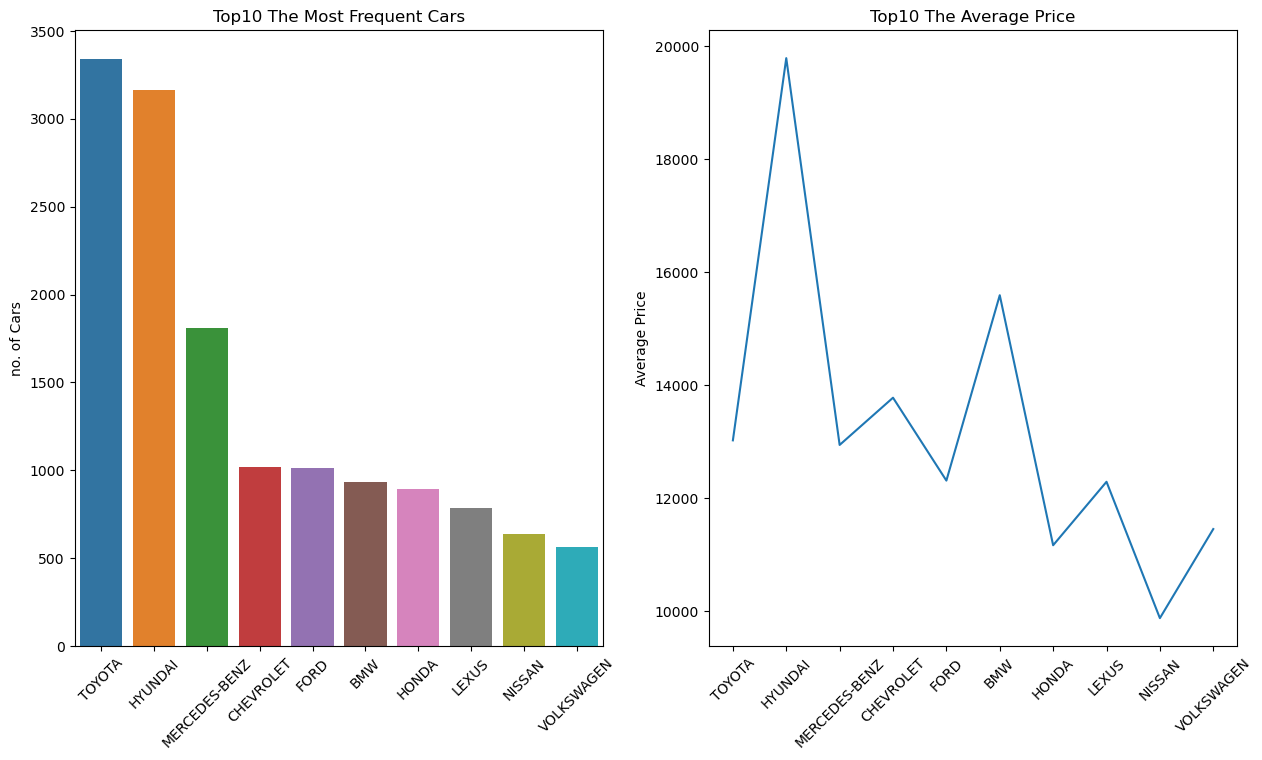

In [33]:
top10_cars = deleted_df['Manufacturer'].value_counts().sort_values(ascending = False)[:10]
top10_mean_prices = [deleted_df[deleted_df['Manufacturer'] == i]['Price'].mean() for i in list(top10_cars.index)]

fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(1,2,1)
sns.barplot(x=top10_cars.index,y=top10_cars.values)
plt.xticks(rotation = 45)
plt.ylabel('no. of Cars')
plt.title('Top10 The Most Frequent Cars')

ax = fig.add_subplot(1,2,2)
sns.lineplot(x=top10_cars.index,y=top10_mean_prices)
plt.xticks(rotation = 45)
plt.ylabel('Average Price')
plt.title('Top10 The Average Price')

In [34]:
deleted_df.groupby('Doors')['Drive wheels'].value_counts()

Doors  Drive wheels
2      Rear              328
       Front             283
       4x4               103
4      Front           11369
       4x4              3360
       Rear             1685
5      Front              50
       Rear               30
       4x4                29
Name: Drive wheels, dtype: int64

In [35]:
dd_val = np.array(deleted_df.groupby('Doors')['Drive wheels'].value_counts().values).reshape(3,3)
dd_sum = dd_val.sum(axis=1).reshape(3,1)
dd_sum = np.c_[dd_sum, dd_sum, dd_sum].flatten()

(deleted_df.groupby('Doors')['Drive wheels'].value_counts() / dd_sum)*100

Doors  Drive wheels
2      Rear            45.938375
       Front           39.635854
       4x4             14.425770
4      Front           69.264043
       4x4             20.470330
       Rear            10.265627
5      Front           45.871560
       Rear            27.522936
       4x4             26.605505
Name: Drive wheels, dtype: float64

In [36]:
deleted_df.groupby('Drive wheels')['Price'].mean().sort_values(ascending=False)

Drive wheels
Front    14698.763887
Rear     13724.034753
4x4      13009.303265
Name: Price, dtype: float64

In [37]:
deleted_df.groupby('Gear box type')['Price'].median().sort_values(ascending=False)

Gear box type
Tiptronic    17876.0
Variator     13172.0
Automatic    11604.0
Manual        8781.0
Name: Price, dtype: float64

In [38]:
deleted_df.groupby('Color')['Price'].mean().sort_values(ascending=False)

Color
Yellow           16172.400000
Grey             15498.783898
Brown            14933.323353
White            14868.384520
Carnelian red    14823.047904
Orange           14695.240506
Beige            14418.140625
Black            14295.392126
Silver           13975.414078
Sky blue         13961.554622
Golden           13453.007246
Blue             12818.417317
Red              12400.143573
Green             9146.013158
Pink              8844.666667
Purple            8837.384615
Name: Price, dtype: float64

In [39]:
deleted_df.groupby('has_turbo')['Price'].median().sort_values(ascending=False)

has_turbo
True     18189.0
False    11917.0
Name: Price, dtype: float64

In [40]:
deleted_df.groupby('Wheel')['Price'].median().sort_values(ascending=False)

Wheel
Left wheel          13485.0
Right-hand drive     8467.0
Name: Price, dtype: float64

In [41]:
deleted_df.groupby('Fuel type')['Price'].median().sort_values(ascending=False)

Fuel type
Plug-in Hybrid    22580.0
Hydrogen          20385.0
Diesel            18817.0
LPG               13485.0
Petrol            11992.0
Hybrid            10036.0
CNG                7527.0
Name: Price, dtype: float64

In [42]:
deleted_df['Fuel type'].value_counts()

Petrol            9174
Diesel            3564
Hybrid            3344
LPG                627
CNG                444
Plug-in Hybrid      83
Hydrogen             1
Name: Fuel type, dtype: int64

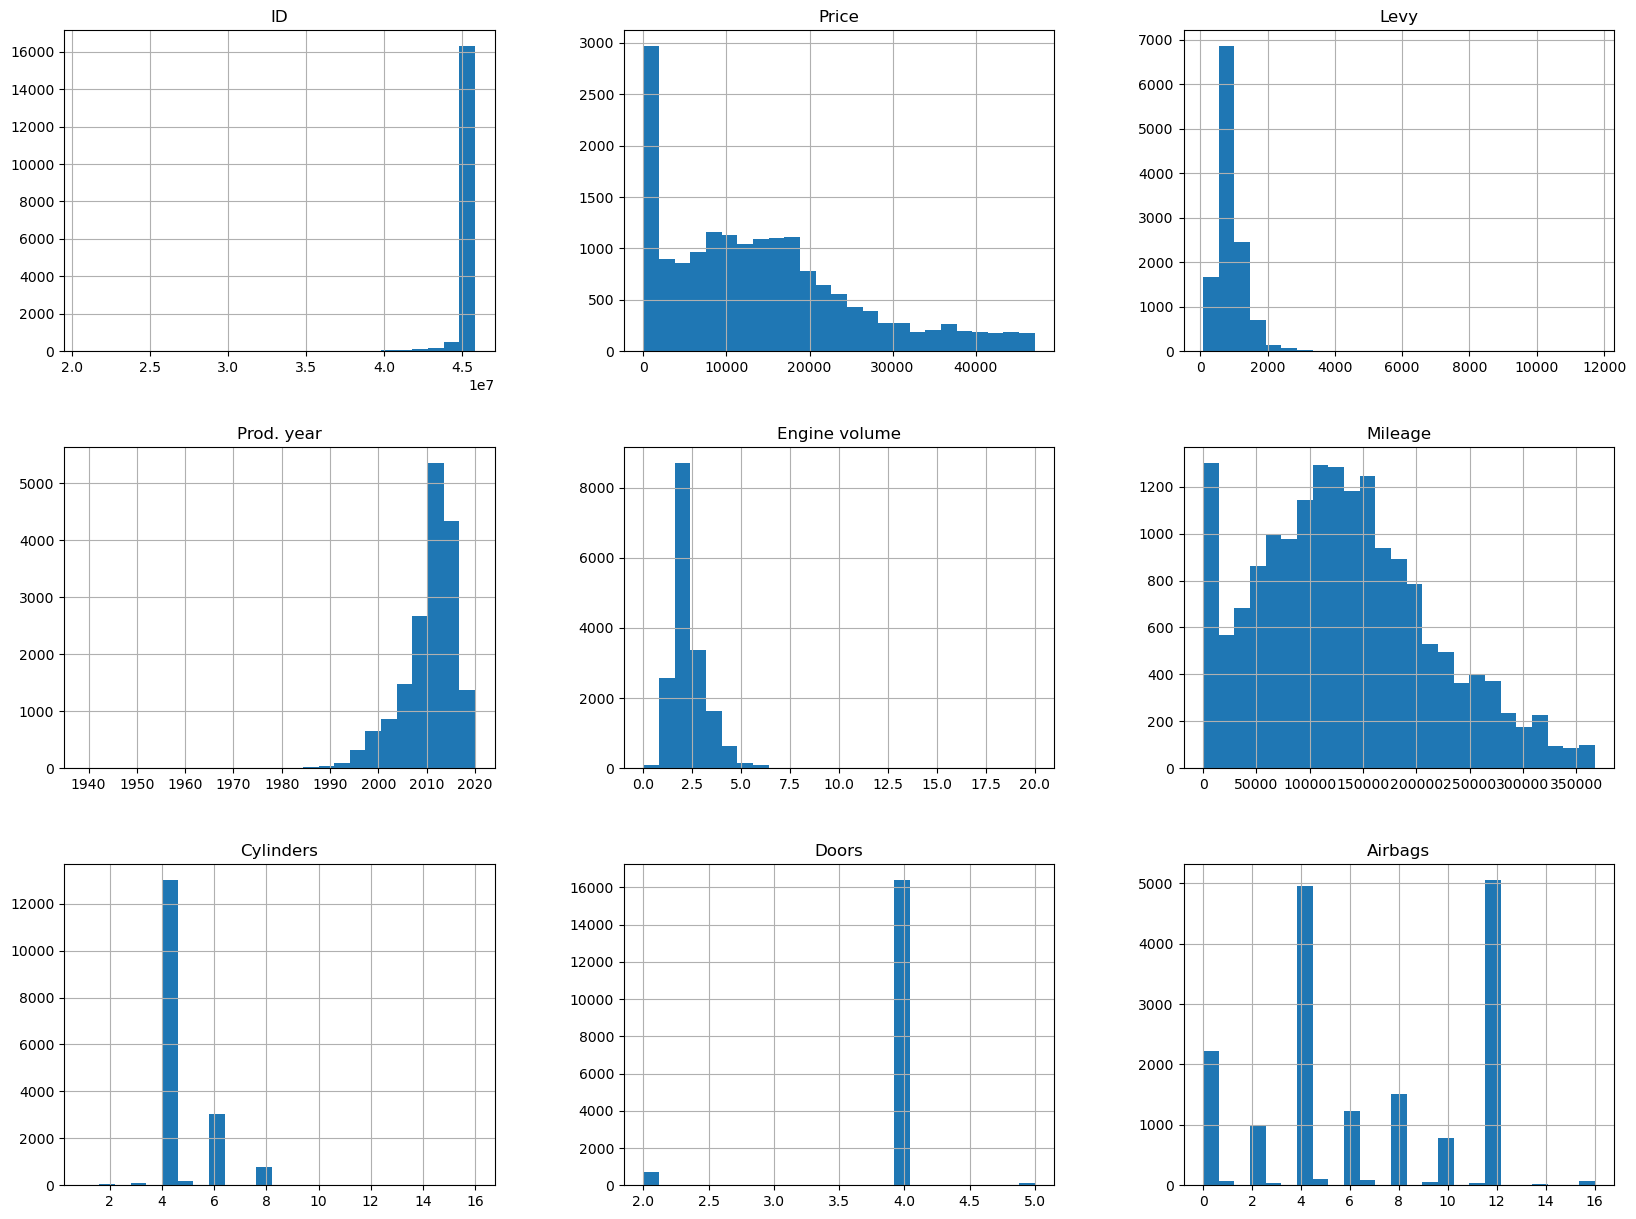

In [43]:
%matplotlib inline

deleted_df.hist(bins=25, figsize=(20,15))
plt.show()

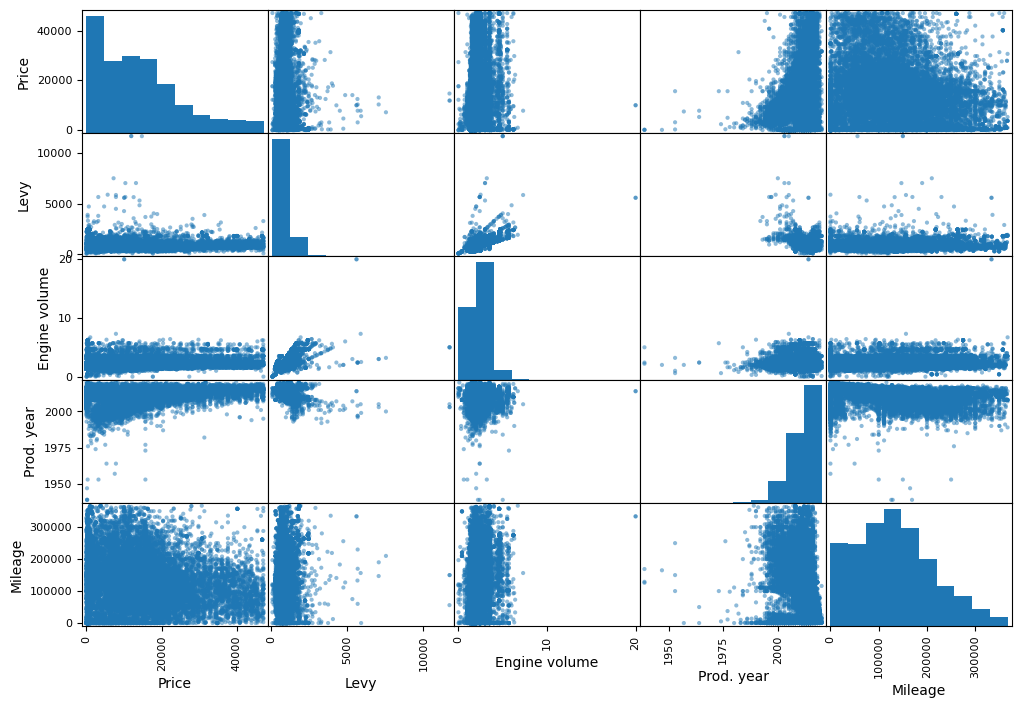

In [44]:
attributes = ['Price','Levy','Engine volume','Prod. year','Mileage']
scatter_matrix(deleted_df[attributes], figsize=(12,8))
plt.show()

There positive correlation between Engine volume and Levy and slightly negative correlation between Levy and Prod. year. Let's check the actual correlation scores between those attributes.

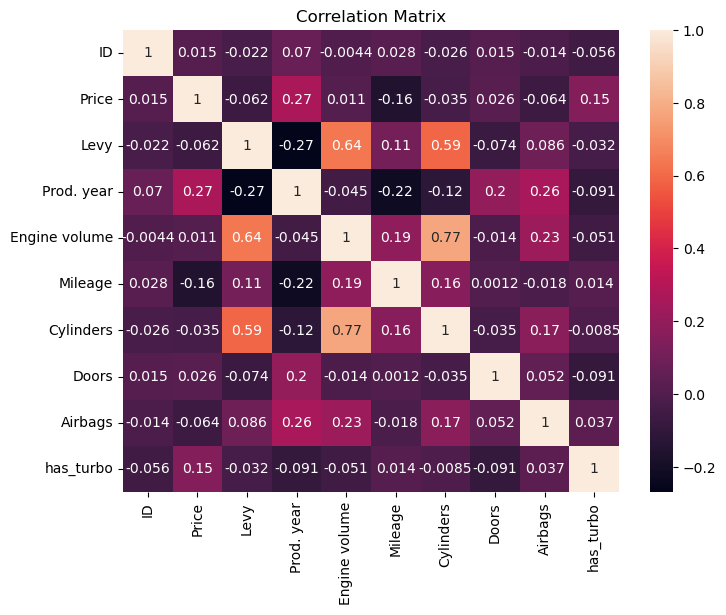

In [45]:
plt.figure(figsize=(8,6))
sns.heatmap(deleted_df.corr(),annot=True, cbar = True)
plt.title('Correlation Matrix')
plt.show()

The assumptions we made from scatter plot seems quite correct! The correliation between Levy and Engine volume 0.64 (not bad!). Engine volume and Cylinders has quite strong relationship which is 0.78 not that suprising that the cars have more cylinders have more engine volume and Levy.

Model Setup

In [46]:
numerical_columns=["Levy","Prod. year","Doors","Engine volume", "Mileage", "Cylinders", "Airbags"]
categorical_columns=["Manufacturer","Model","Category","Leather interior","Fuel type","Gear box type","Drive wheels","Wheel","Color","has_turbo"]

In [47]:
num_cars = deleted_df[numerical_columns]
y = deleted_df['Price']
cat_cars = deleted_df[categorical_columns]

In [48]:
Imputer = SimpleImputer(strategy='median')

Imputer.fit(num_cars)
# Displaying medians of every numveric column we have
display(Imputer.statistics_)
num_cars = Imputer.transform(num_cars)

array([7.790e+02, 2.012e+03, 4.000e+00, 2.000e+00, 1.267e+05, 4.000e+00,
       6.000e+00])

In [49]:
scaler = StandardScaler()
num_cars = scaler.fit_transform(num_cars)

In [50]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())])

Also we need to handle with the categorical columns because the machine learning model we will use expects only numerical values. So we will use one hot encoding, which will give 1 (Hot) the attribute is exist for that sample and 0 (Cold) for others and making full pipeline which will handle numerical values and categorical values at the same time)

In [51]:
full_pipeline = ColumnTransformer([
    ('num',num_pipeline, numerical_columns),
    ('cat',OneHotEncoder(), categorical_columns)  
])
cars_prepared = full_pipeline.fit_transform(deleted_df)

In [52]:
cars_prepared.shape

(17237, 1600)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(cars_prepared, y, test_size=0.33, random_state = 42)

Hyperparameter Tuning and Model Evaluation

LinearRegression

In [54]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [55]:
predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

8143.034974341764

R Square

In [56]:
lin_reg.score(X_train,y_train)

0.5019163179308701

In [57]:
r2_score(y_pred=lin_reg.predict(X_train), y_true=y_train)

0.5019163179308701

Mean Square Error(MSE)/Root Mean Square Error(RMSE)

In [58]:
predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

8714.854620663527

Mean Absolute Error(MAE)

In [59]:
lin_mae = mean_absolute_error(y_test, predictions)
lin_mae

6551.613299610939

SGDRegressor

In [60]:
sgd_reg = SGDRegressor()

sgd_reg.fit(X_train, y_train)

SGDRegressor()

In [61]:
predictions = sgd_reg.predict(X_test)
sgd_mse = mean_squared_error(y_test, predictions)
sgd_rmse = np.sqrt(lin_mse)
sgd_rmse

8714.854620663527

DecisionTreeRegressor

In [62]:
tree_reg = DecisionTreeRegressor(random_state = 42)

tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [63]:
tree_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1058.7449606952366

Just 1058??! Decision tree is really keen on to overfitting so just checking rmse will not be enough to evaluate it let's check cross validation score for it.

cross validation score

In [64]:
scores = cross_val_score(tree_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([7995.48736604, 7764.27933633, 8065.31082876, 7501.49410636,
       7390.48090865])

OK, the results seems more reasonable now. Our model is doing better than linear regression model

In [65]:
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores

array([8873.77780054, 8964.38745497, 9197.04927348, 9022.65425458,
       8666.66351394])

RandomForestRegressor

In [66]:
forest_reg = RandomForestRegressor(n_estimators = 100, random_state=123)

forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [67]:
forest_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2372.881910440568

In [68]:
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores

array([5847.38668696, 6020.11684599, 6258.97744505, 5888.93700089,
       5434.74553778])

Random Forest superiors other 2 algorithm so far so let's continue with this algorithm and tune the hyperparameters for it using GridSearchCV. This step will take 10-20 minutes depending on your computer so be careful before running this cell on your pc)

GridSearchCV

In [ ]:
param_grid = [
    {'n_estimators': [100, 200], 'max_features': [35,33,31]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)